In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report
from tqdm import tqdm


In [2]:
# Load the SMS Spam collection dataset while specifying appropriate encoding format.
data = pd.read_csv('spam.csv',encoding = 'latin-1')
data.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
927,ham,K:)i will give my kvb acc details:),NaN,NaN,NaN
1257,ham,Am also doing in cbe only. But have to pay.,NaN,NaN,NaN
4194,spam,Double mins and txts 4 6months FREE Bluetooth ...,NaN,NaN,NaN
4175,ham,He's in lag. That's just the sad part but we k...,NaN,NaN,NaN
4491,ham,Probably a couple hours tops,NaN,NaN,NaN
993,ham,The Xmas story is peace.. The Xmas msg is love...,NaN,NaN,NaN
3149,ham,Yo! Howz u? girls never rang after india. L,NaN,NaN,NaN
1519,ham,Check wid corect speling i.e. Sarcasm,NaN,NaN,NaN
2409,ham,Aww that's the first time u said u missed me w...,NaN,NaN,NaN
961,spam,URGENT! We are trying to contact U. Todays dra...,NaN,NaN,NaN


In [3]:
data.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4',],inplace = True)
data.rename(columns = {'v1' : 'target', 'v2' : 'text'}, inplace = True)
data.sample(10)

,target,text
1216,spam,You have 1 new voicemail. Please call 08719181...
1886,spam,Dear 0776xxxxxxx U've been invited to XCHAT. T...
1572,spam,Ur cash-balance is currently 500 pounds - to m...
5401,ham,Babes I think I got ur brolly I left it in Eng...
15,spam,"XXXMobileMovieClub: To use your credit, click ..."
3447,ham,Its &lt;#&gt; k here oh. Should i send home f...
5268,ham,\ER
1039,ham,They just talking thats it de. They wont any o...
4552,ham,Sun ah... Thk mayb can if dun have anythin on....
1010,ham,Lol I would but my mom would have a fit and te...


In [4]:
# Preprocessing the input data
data.drop_duplicates(inplace = True)
data['LABEL'] = data['target'].map({'ham': 'ham' , 'spam' :'spam'})
x = data['text']
y = data['LABEL']

In [5]:
# Split the data into two sets: Training set ans testing set
x_train, x_test,y_train, y_test,= train_test_split(x,y, test_size=0.2, random_state=42)

In [6]:
# Create a TF_IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

In [7]:
# Fit the vectorizer to the training data
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

In [8]:
# Initialize a Naive bayes classifier
classifier = MultinomialNB()

In [9]:
# Train the classifier
classifier.fit(x_train_tfidf,y_train)

MultinomialNB()

In [10]:
# Transform the test data using the same vectorizer
x_test_tfidf = tfidf_vectorizer.transform(x_test)

In [11]:
# Make prediction
y_pred = classifier.predict(x_test_tfidf)

In [12]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

In [13]:
# Display classification report with labels 'ham' and 'spam'
report = classification_report(y_test,y_pred, target_names=['Legitimate SMS' , 'Spam SMS'])

In [14]:
# Create a progress bar 
#progress_bar = tqdm(total=100 , position=0 , leave=True)

In [15]:
# Simulate progress updates
progress_bar = tqdm(total=100 , position=0 , leave=True)
for i in range(10,101, 10):
    progress_bar.update(10)
    progress_bar.set_description(f'Progress: {i}%')

Progress: 100%: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 15318.30it/s]

In [16]:
# Close the progress update
progress_bar.close()

Progress: 100%: 100%|██████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 6804.41it/s]


In [17]:
encoder = LabelEncoder()

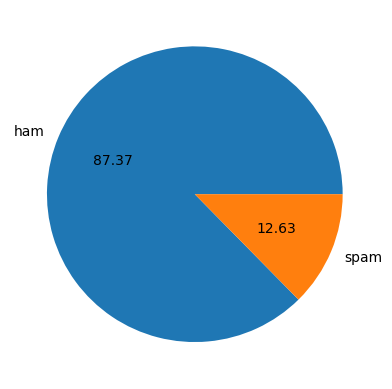

In [18]:
data['target'] = encoder.fit_transform(data['target'])
plt.pie(data['target'].value_counts(),labels = ['ham','spam'],autopct="%0.2f")
plt.show()

In [27]:
data['num_characters'] = data['text'].apply(len)
data.head()

,target,text,LABEL,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",ham,111,24,2
1,0,Ok lar... Joking wif u oni...,ham,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,spam,155,37,2
3,0,U dun say so early hor... U c already then say...,ham,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",ham,61,15,1


In [20]:
data['num_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))
data['num_sentences']= data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [21]:
data.head()

,target,text,LABEL,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",ham,111,24,2
1,0,Ok lar... Joking wif u oni...,ham,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,spam,155,37,2
3,0,U dun say so early hor... U c already then say...,ham,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",ham,61,15,1


In [22]:
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


C:\Users\sarvesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarvesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

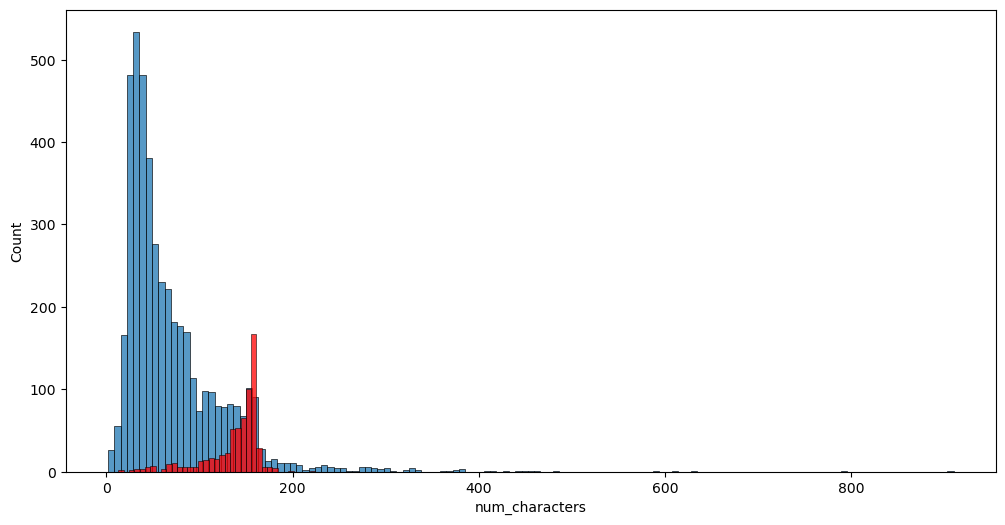

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['num_characters'])
sns.histplot(data[data['target'] == 1]['num_characters'], color='red')

C:\Users\sarvesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarvesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

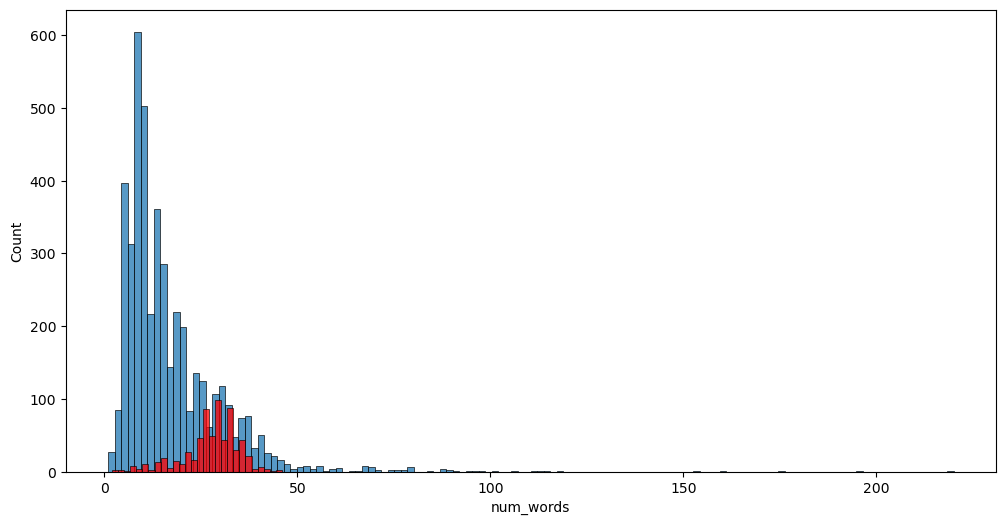

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['num_words'])
sns.histplot(data[data['target'] == 1]['num_words'], color='red')

C:\Users\sarvesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarvesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarvesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


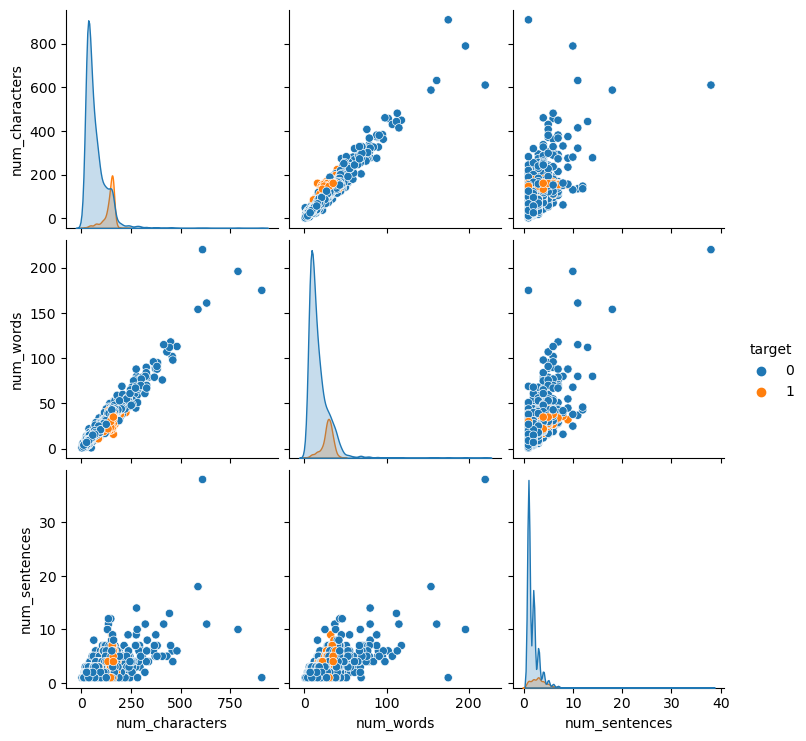

In [32]:
sns.pairplot(data, hue = 'target')

In [33]:
# Display the results on the interface where the code was initiated from.
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.96
Classification Report:
                precision    recall  f1-score   support

Legitimate SMS       0.95      1.00      0.97       889
      Spam SMS       1.00      0.68      0.81       145

      accuracy                           0.96      1034
     macro avg       0.98      0.84      0.89      1034
  weighted avg       0.96      0.96      0.95      1034

